In [1]:
#!/usr/bin/env python3

"""
This script comes from the RTRBM code by Ilya Sutskever from
http://www.cs.utoronto.ca/~ilya/code/2008/RTRBM.tar
"""

from numpy import *
from scipy import *
import pdb
# import cPickle as pickle
import scipy.io

import matplotlib

matplotlib.use('Agg')
import matplotlib.pyplot as plt

shape_std = shape


def shape(A):
    if isinstance(A, ndarray):
        return shape_std(A)
    else:
        return A.shape()


size_std = size


def size(A):
    if isinstance(A, ndarray):
        return size_std(A)
    else:
        return A.size()


det = linalg.det


def new_speeds(m1, m2, v1, v2):
    new_v2 = (2 * m1 * v1 + v2 * (m2 - m1)) / (m1 + m2)
    new_v1 = new_v2 + (v2 - v1)
    return new_v1, new_v2


def norm(x): return sqrt((x ** 2).sum())


def sigmoid(x):        return 1. / (1. + exp(-x))


SIZE = 10


# size of bounding box: SIZE X SIZE.

def bounce_n(T=128, n=2, r=None, m=None):
    if r == None: r = array([1.2] * n)
    if m == None: m = array([1] * n)
    # r is to be rather small.
    X = zeros((T, n, 2), dtype='float')
    v = randn(n, 2)
    v = v / norm(v) * .5
    good_config = False
    while not good_config:
        x = 2 + rand(n, 2) * 8
        good_config = True
        for i in range(n):
            for z in range(2):
                if x[i][z] - r[i] < 0:      good_config = False
                if x[i][z] + r[i] > SIZE:     good_config = False

        # that's the main part.
        for i in range(n):
            for j in range(i):
                if norm(x[i] - x[j]) < r[i] + r[j]:
                    good_config = False

    eps = .5
    for t in range(T):
        # for how long do we show small simulation

        for i in range(n):
            X[t, i] = x[i]

        for mu in range(int(1 / eps)):

            for i in range(n):
                x[i] += eps * v[i]

            for i in range(n):
                for z in range(2):
                    if x[i][z] - r[i] < 0:  v[i][z] = abs(v[i][z])  # want positive
                    if x[i][z] + r[i] > SIZE: v[i][z] = -abs(v[i][z])  # want negative

            for i in range(n):
                for j in range(i):
                    if norm(x[i] - x[j]) < r[i] + r[j]:
                        # the bouncing off part:
                        w = x[i] - x[j]
                        w = w / norm(w)

                        v_i = dot(w.transpose(), v[i])
                        v_j = dot(w.transpose(), v[j])

                        new_v_i, new_v_j = new_speeds(m[i], m[j], v_i, v_j)

                        v[i] += w * (new_v_i - v_i)
                        v[j] += w * (new_v_j - v_j)

    return X


def ar(x, y, z):
    return z / 2 + arange(x, y, z, dtype='float')


def matricize(X, res, r=None):
    T, n = shape(X)[0:2]
    if r == None: r = array([1.2] * n)

    A = zeros((T, res, res), dtype='float')

    [I, J] = meshgrid(ar(0, 1, 1. / res) * SIZE, ar(0, 1, 1. / res) * SIZE)

    for t in range(T):
        for i in range(n):
            A[t] += exp(-(((I - X[t, i, 0]) ** 2 + (J - X[t, i, 1]) ** 2) / (r[i] ** 2)) ** 4)

        A[t][A[t] > 1] = 1
    return A


def bounce_mat(res, n=2, T=128, r=None):
    if r == None: r = array([1.2] * n)
    x = bounce_n(T, n, r);
    A = matricize(x, res, r)
    return A


def bounce_vec(res, n=2, T=128, r=None, m=None):
    if r == None: r = array([1.2] * n)
    x = bounce_n(T, n, r, m);
    V = matricize(x, res, r)
    return V.reshape(T, res ** 2)


# make sure you have this folder
logdir = './sample'


def show_sample(V):
    T = len(V)
    res = int(sqrt(shape(V)[1]))
    for t in range(T):
        plt.imshow(V[t].reshape(res, res), cmap=matplotlib.cm.Greys_r)
        # Save it
        fname = logdir + '/' + str(t) + '.png'
        plt.savefig(fname)


In [3]:


if __name__ == "__main__":
    res = 28
    T = 100
    N = 100
    dat = empty((N), dtype=object)
    for i in range(N):
        dat[i] = bounce_vec(res=res, n=3, T=100)
    data = {}
    data['Data'] = dat
    scipy.io.savemat('bouncing_balls_training_data.mat', data)

#     N = 200
#     dat = empty((N), dtype=object)
#     for i in range(N):
#         dat[i] = bounce_vec(res=res, n=3, T=100)
#     data = {}
#     data['Data'] = dat
#     scipy.io.savemat('bouncing_balls_testing_data.mat', data)

    # show one video
    show_sample(dat[1])
    # ffmpeg -start_number 0 -i %d.png -c:v libx264 -pix_fmt yuv420p -r 30 sample.mp4


/home/ira/code/envs/flexi/lib/python3.5/site-packages/ipykernel/__main__.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/ira/code/envs/flexi/lib/python3.5/site-packages/ipykernel/__main__.py:122: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


FileNotFoundError: [Errno 2] No such file or directory: './sample/0.png'

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
i = 0

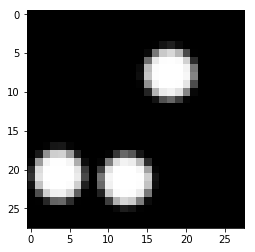

In [62]:
im = dat[0][i].reshape((28, 28))
plt.imshow(im, cmap='gray')
i += 1

In [66]:
import numpy as np

In [2]:
a = np.arange(10)

NameError: name 'np' is not defined

In [3]:
a[np.logical_and(a>4, a<8)]

NameError: name 'a' is not defined

In [4]:
a

NameError: name 'a' is not defined